# Poisoning Attack

#We demostrate a poisoning attack. More information and a great collection of codes/functionalities can be obtained from the IBM's adverserial ML toolbox, link below:

adversarial-robustness-toolbox
https://github.com/IBM/adversarial-robustness-toolbox

Hope you will enjoy the demo! Cheers.


In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    weights=[.5, .5],
    random_state=17)

from sklearn.neural_network import MLPClassifier


In [3]:
clf = MLPClassifier(max_iter=600, random_state=123).fit(X[:100], y[:100])

import numpy as np

#xx,yy = np.mgrid[-3:3:.01,−3:3:.01]
xx,yy=np.mgrid[-3:3:.01,-3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)


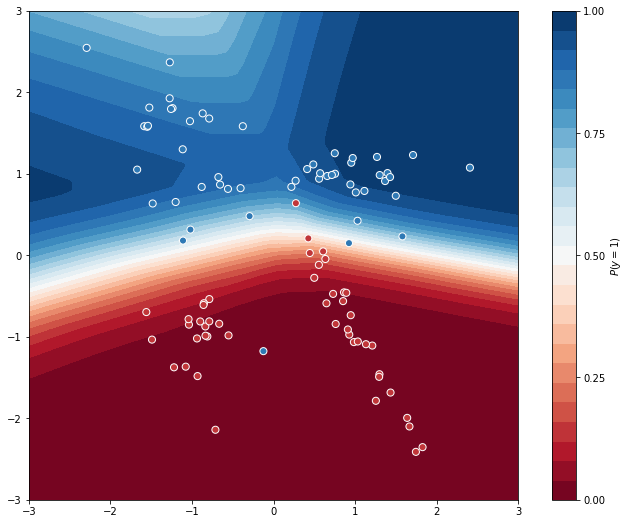

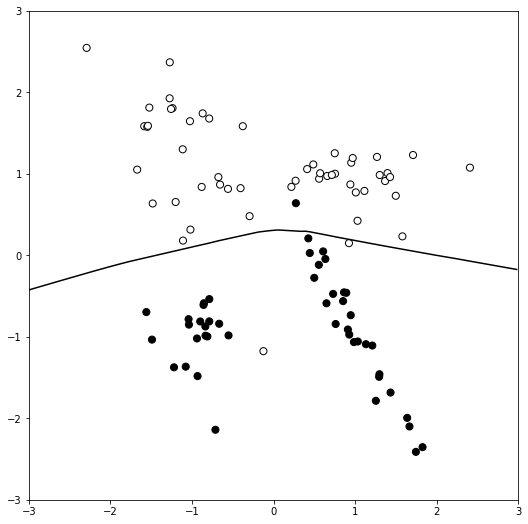

In [5]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(12, 9))

# Plot the contour background
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# Plot the test set (latter half of X and y)
ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3))

def plot_decision_boundary(X_orig, y_orig, probs_orig, chaff_X=None, chaff_y=None, probs_poisoned=None):
    f, ax = plt.subplots(figsize=(12, 9))

    ax.scatter(X_orig[100:,0], X_orig[100:, 1], 
               c=y_orig[100:], s=50, cmap="gray",
               edgecolor="black", linewidth=1)
    
    if all([(chaff_X is not None),
            (chaff_y is not None),
            (probs_poisoned is not None)]):
        ax.scatter(chaff_X[:,0], chaff_X[:, 1], 
                   c=chaff_y, s=50, cmap="gray", 
                   marker="*", edgecolor="black", linewidth=1)
        ax.contour(xx, yy, probs_orig, levels=[.5], 
                   cmap="gray", vmin=0, vmax=.8)
        ax.contour(xx, yy, probs_poisoned, levels=[.5], 
                   cmap="gray")
    else:
        ax.contour(xx, yy, probs_orig, levels=[.5], cmap="gray")

    ax.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3))


plot_decision_boundary(X, y, probs)




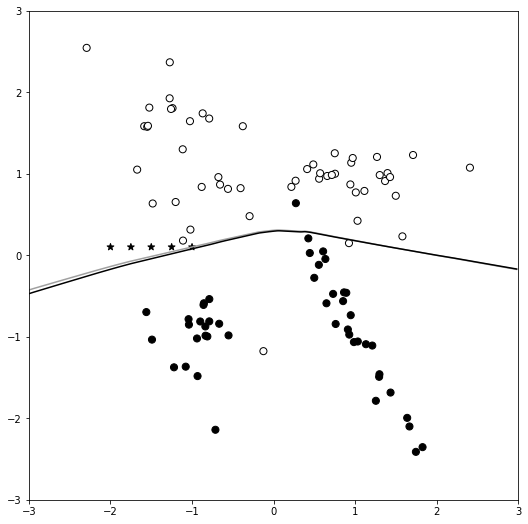

In [6]:

num_chaff = 5
chaff_X = np.array([np.linspace(-2, -1, num_chaff), np.linspace(0.1, 0.1, num_chaff)]).T
chaff_y = np.ones(num_chaff)

#After 1x partial fitting


clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)


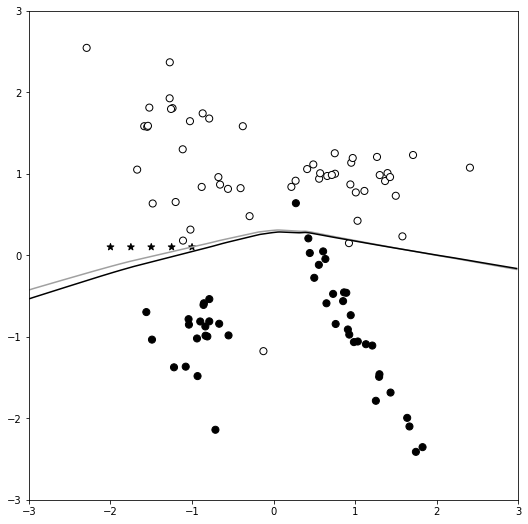

In [7]:
#After 2x partial fitting


clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)



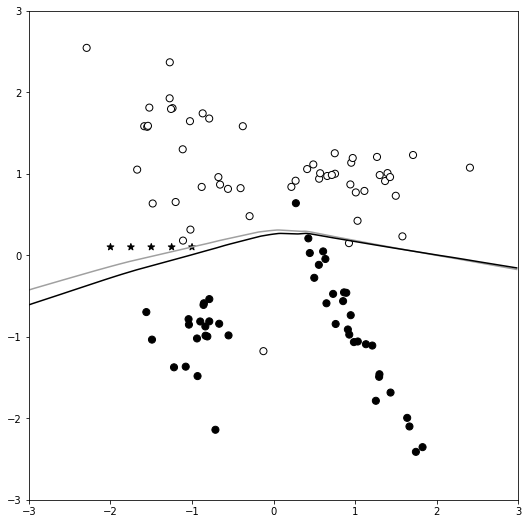

In [8]:
#After 3x partial fitting

clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)



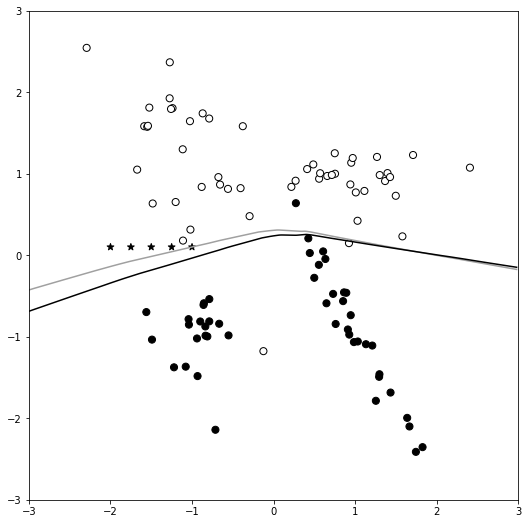

In [9]:
#After 4x partial fitting

clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)



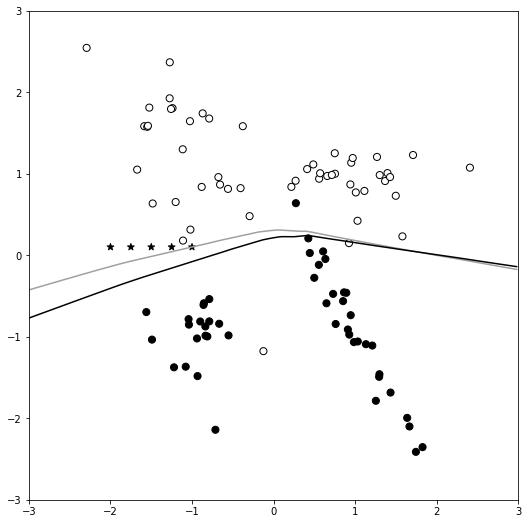

In [10]:

#After 5x partial fitting

clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)



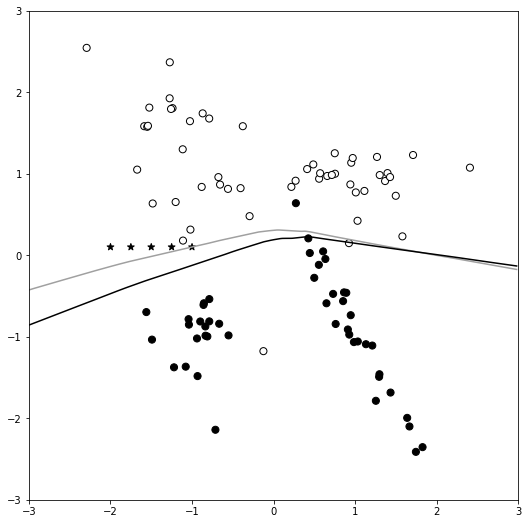

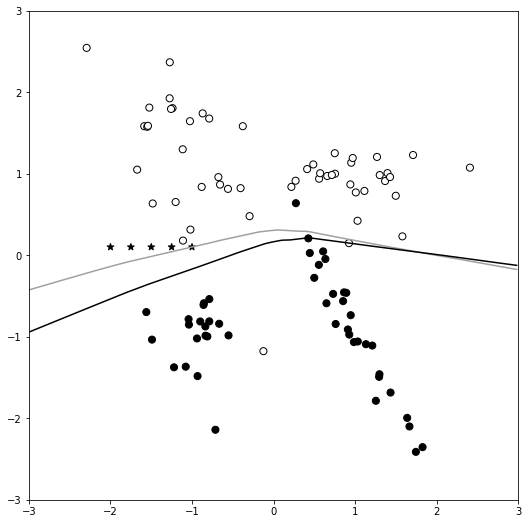

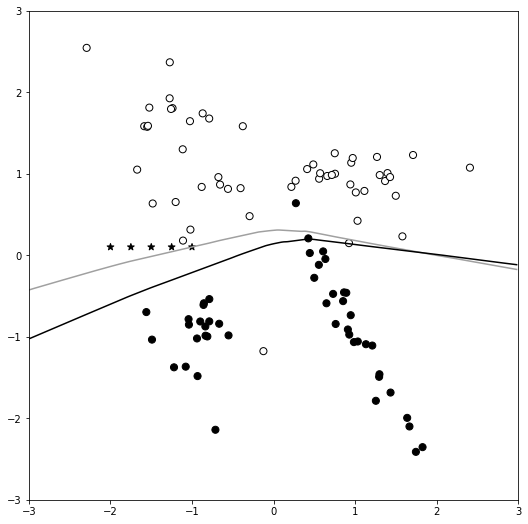

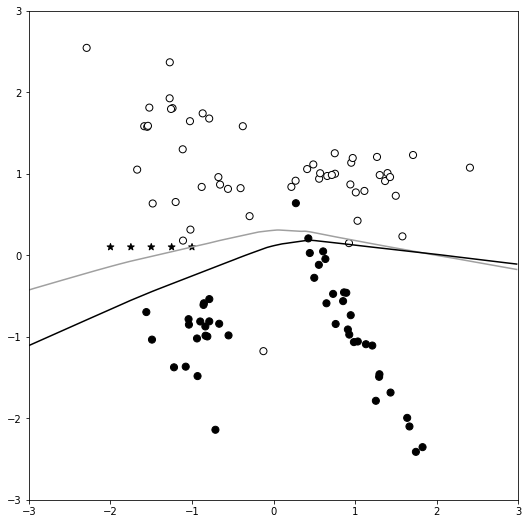

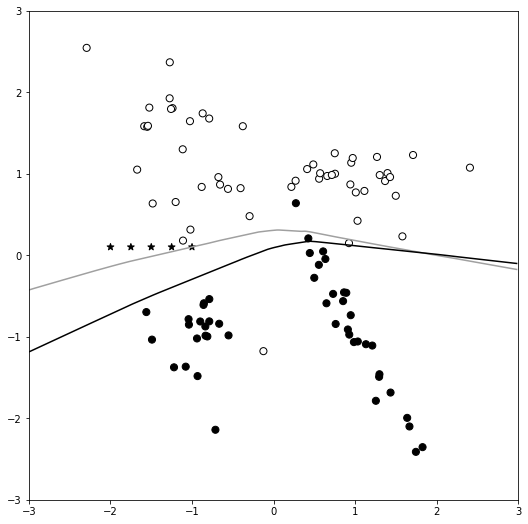

In [11]:
# Repeat the five steps all together to see the difference

num_chaff = 5
chaff_X = np.array([np.linspace(-2, -1, num_chaff), np.linspace(0.1, 0.1, num_chaff)]).T
chaff_y = np.ones(num_chaff)

#After 1x partial fitting


clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

#After 2x partial fitting


clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

#After 3x partial fitting

clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)


#After 4x partial fitting

clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)


#After 5x partial fitting

clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

